# object detection image segmentation

In [54]:
!source venv/bin/activate

zsh:source:1: no such file or directory: venv/bin/activate


In [2]:
import os
import sys

!cd (pwd)
print(os.getcwd())



zsh:1: number expected


/Users/saichi/Documents/GitHub/declutter


In [3]:
!pip install ultralytics

In [4]:
!pip install pathlib numpy opencv-python pillow

/Users/saichi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


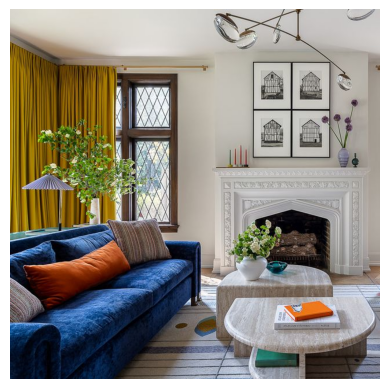

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from pathlib import Path
from ultralytics import YOLO
import cv2 as cv

model_seg = YOLO('yolov8n-seg.pt')
imgs=['image1.jpg']
img = mpimg.imread(imgs[0]) #Replace "image.jpg" with the path of your image
H , W , _ = cv.imread(imgs[0]).shape
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
result_seg = model_seg(img)


0: 640x640 1 bowl, 1 couch, 2 potted plants, 1 dining table, 1 book, 3 vases, 146.5ms
Speed: 3.3ms preprocess, 146.5ms inference, 13.8ms postprocess per image at shape (1, 3, 640, 640)


In [7]:

result_seg[0].masks.data[0].unique()
# result_seg[0].show()  # display to screen
result_seg[0].save(filename='seg_res.jpg')  # save to disk


'seg_res.jpg'

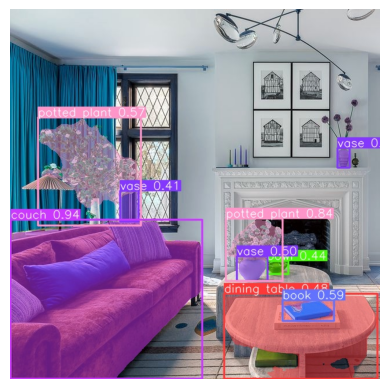

In [8]:

res = mpimg.imread('seg_res.jpg') #Replace "image.jpg" with the path of your image
plt.imshow(res)
plt.axis('off')
plt.show()

# create mask

In [10]:
def inverte(imagem, name):
    imagem = (255-imagem)
    cv.imwrite(name, imagem)

In [11]:
for j, mask in enumerate(result_seg[0].masks.data):

    mask = mask.cpu().numpy() * 255
    mask = mask.astype(np.uint8)
    mask = np.squeeze(mask)
    mask = np.stack([mask, mask, mask], axis=-1)
    mask = mask.astype(np.uint8)

    mask = cv.resize(mask, (W, H))


    cv.imwrite(f'./resmask{j}.png', mask)
    inverte(mask,f'./invresmask{j}.png')

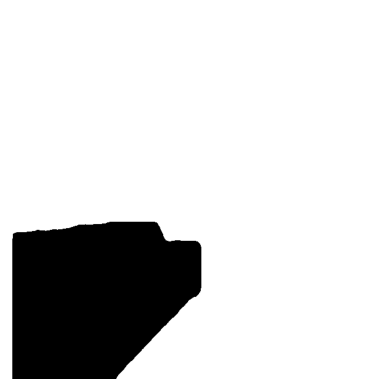

In [12]:
maskres = mpimg.imread('invresmask0.png') #Replace "image.jpg" with the path of your image
plt.imshow(maskres)
plt.axis('off')
plt.show()

# combined mask

In [ ]:
# def create_combined_mask(mask_iterator, img_size):
#     combined_mask = np.zeros(img_size, dtype=np.uint8)
    
#     for j, mask in enumerate(mask_iterator):
#         mask = mask.cpu().numpy() * 255
#         mask = mask.astype(np.uint8)
#         mask = np.squeeze(mask)
#         mask = np.stack([mask, mask, mask], axis=-1)
#         mask = mask.astype(np.uint8)
#         mask = cv.resize(mask, img_size[::-1])  # Assuming img_size is (width, height)

#         combined_mask = np.maximum(combined_mask, mask)

#     combined_mask = np.clip(combined_mask, 0, 255).astype(np.uint8)
#     return combined_mask


In [13]:
!pip install python-io typing pillow

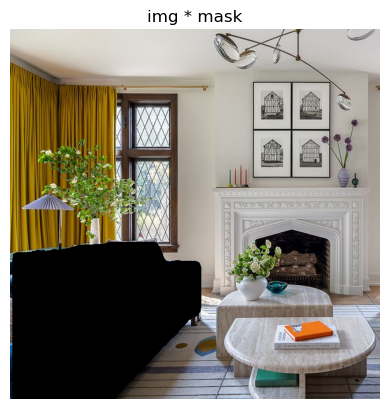

In [16]:

img_with_mask = img * (maskres[:,:] / 255.0)
cr=plt.imshow(img_with_mask)
img_with_mask = cv.resize(img_with_mask, (W, H))
cv.imwrite('./image_mask.png', img_with_mask)
cr=plt.axis('off')
cr=plt.title('img * mask')
plt.show()

# LaMa infill attempt 1

# base code

In [17]:
import base64
from io import BytesIO
from typing import List, Tuple

from PIL import Image

def image_to_base64(image: Image.Image, format="JPEG") -> str:
    """Convert an image to its base64 representation."""
    buffer = BytesIO()
    image.save(buffer, format=format)
    image_str = base64.b64encode(buffer.getvalue()).decode("utf-8")
    return image_str


def base64_to_image(image_str: str) -> Image.Image:
    """Convert an image from its base64 representation."""
    image = Image.open(BytesIO(base64.b64decode(image_str)))
    return image


def image_grid(imgs: List[Image.Image], rows: int = 2, cols: int = 2):
    """Display images in a grid."""
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

In [36]:
print('\n> Install dependencies')
# !pip install torch torchvision torchaudio torchtext
# !pip install -r lama/requirements.txt --quiet
# !pip install wget --quiet



# print('\n> Changing the dir to:')

# print('\n> Download the model')
# !curl -L $(yadisk-direct https://disk.yandex.ru/d/ouP6l8VJ0HpMZg) -o big-lama.zip
# !unzip big-lama.zip

# print('>fixing opencv')
# !pip uninstall opencv-python-headless -y --quiet
!pip install opencv-python-headless --quiet


# print('\n> Init mask-drawing code')
# import base64, os
# from IPython.display import HTML, Image
# from base64 import b64decode
# import matplotlib.pyplot as plt
# import numpy as np
# import wget
# from shutil import copyfile
# import shutil



> Install dependencies


In [5]:
import base64, os
from IPython.display import HTML, Image
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import wget
from shutil import copyfile
import shutil


In [18]:
!cp image_mask.png $(pwd)/testing
!cp image1.jpg $(pwd)/testing

In [ ]:
!pip install -r requirements.txt

In [28]:
!pip install easydict Bottleneck pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.9/800.9 kB 9.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 12.2 MB/s eta 0:00:00a 0:00:01


In [29]:



%cd lama

!PYTHONPATH=. TORCH_HOME=$(pwd) python3 bin/predict.py model.path=$(pwd)/big-lama indir=$(pwd)/testing outdir=$(pwd)/output  dataset.img_suffix=.jpg > /dev/null
%cd ..

/Users/saichi/Documents/GitHub/declutter/lama
/Users/saichi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
Traceback (most recent call last):
  File "/Users/saichi/Documents/GitHub/declutter/lama/bin/predict.py", line 15, in <module>
    from saicinpainting.evaluation.refinement import refine_predict
  File "/Users/saichi/Documents/GitHub/declutter/lama/saicinpainting/evaluation/refinement.py", line 4, in <module>
    from kornia.filters import gaussian_blur2d
ModuleNotFoundError: No module named 'kornia'
/Users/saichi/Documents/GitHub/declutter
